**This notebook demonstrates entanglement using Bell states**
$$
   \newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}
   \newcommand{\ket}[1]{\left|{#1}\right\rangle}
   \newcommand{\bra}[1]{\left\langle{#1}\right|}
$$

Entanglement is demonstrated using two qubits in the entangled *Bell* state:
$\frac{1}{\sqrt{2}}\left(\ket{00} + \ket{11}\right)$.

The first qubit is subject to measurements:
- $Z$: standard measurement 
- $X$: to measure this observable, rotate the measurement basis ($Z$) to the $W$ axis using the $H$-gate.

The second qubit is subject to measurements:
- $W$: to measure this observable, rotate the measurement basis ($Z$) to the $W$ axis, $W = \frac{1}{\sqrt{2}}\left(Z+X\right)$ using the sequence of gates: $SHTH$
- $V$: to measure this observable, rotate the measurement basis ($Z$) to the $V$ axis, $V = \frac{1}{\sqrt{2}}\left(Z-X\right)$ using the sequence of gates: $SHT^{\dagger}H$.

The correlated expectation value $\left\langle AB \right\rangle$ for two measurements $A$ and $B$ is given by:

$$
\left\langle AB \right\rangle = Pr(0,0) + Pr(1,1) - Pr(0,1) - Pr(1,0)
$$

and the Clauser-Horne-Shimony-Holt inequality $\left|C\right| \le 2$ where:

$$
C = \left\langle AB \right\rangle - \left\langle AB^\prime \right\rangle + \left\langle A^{\prime}B \right\rangle + \left\langle A^{\prime}B^{\prime} \right\rangle.
$$

In [1]:
import os, sys
from qiskit import *
from qiskit.compiler import transpile, assemble
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, execute, Aer, IBMQ

# Import local tools
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import backend_tools
import tools

# Get a backend
IBMQ.load_accounts()
device = backend_tools.get_device(use_sim=True, min_qubits=2)

*Set up the circuits*

ZW


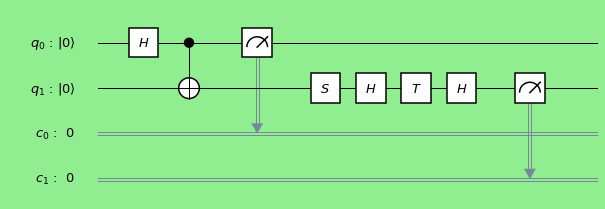

ZV


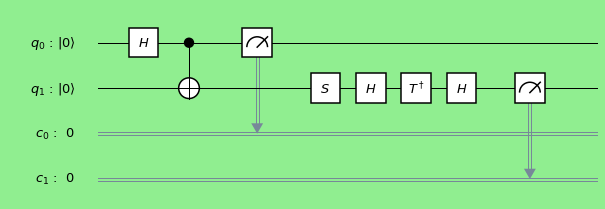

XW


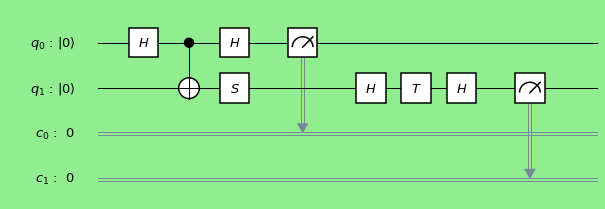

XV


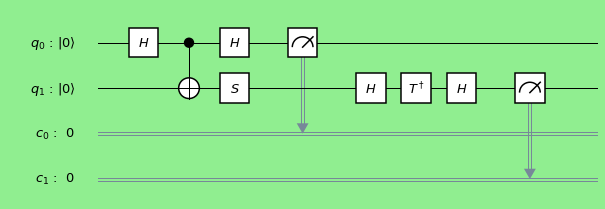

In [2]:
# Define the quantum circuit
qr = QuantumRegister(2, 'q')
cr = ClassicalRegister(2, 'c')

circuits = []
titles = []

# ZW measurement
circuit = QuantumCircuit(qr, cr)
circuit.h(qr[0])
circuit.cx(qr[0], qr[1])
circuit.s(qr[1])
circuit.h(qr[1])
circuit.t(qr[1])
circuit.h(qr[1])
circuit.measure(qr, cr)
circuits.append(circuit)
titles.append("ZW")

# ZV measurement
circuit = QuantumCircuit(qr, cr)
circuit.h(qr[0])
circuit.cx(qr[0], qr[1])
circuit.s(qr[1])
circuit.h(qr[1])
circuit.tdg(qr[1])
circuit.h(qr[1])
circuit.measure(qr, cr)
circuits.append(circuit)
titles.append("ZV")

# XW measurement
circuit = QuantumCircuit(qr, cr)
circuit.h(qr[0])
circuit.cx(qr[0], qr[1])
circuit.h(qr[0])
circuit.s(qr[1])
circuit.h(qr[1])
circuit.t(qr[1])
circuit.h(qr[1])
circuit.measure(qr, cr)
circuits.append(circuit)
titles.append("XW")

# XV measurement
circuit = QuantumCircuit(qr, cr)
circuit.h(qr[0])
circuit.cx(qr[0], qr[1])
circuit.h(qr[0])
circuit.s(qr[1])
circuit.h(qr[1])
circuit.tdg(qr[1])
circuit.h(qr[1])
circuit.measure(qr, cr)
circuits.append(circuit)
titles.append("XV")

# Draw the circuits
%matplotlib inline
style = {'backgroundcolor': 'lightgreen'}
for circuit, label in zip(circuits, titles):
    print(label)
    circuit.draw(output="mpl")
    tools.show_figure(circuit.draw(output='mpl', plot_barriers=True, reverse_bits=False, style=style, scale=0.7))

*Run the circuits*

Note: this code computes the CHSH value $C$ using the expression:
$$
C = \left\langle AB \right\rangle + \left\langle AB^\prime \right\rangle + \left\langle A^{\prime}B \right\rangle - \left\langle A^{\prime}B^{\prime} \right\rangle
$$
to match the example in the IBM docs, however this differs from the (correct) CHSH expression as shown above. The reason for this discrepancy is unknown.

In [5]:
# Simulate or run the circuit
shots = 1024
job = execute(circuits, backend=device, shots=shots)
result = job.result()

# Output the results
correl = {}
for index, label in enumerate(titles):
    data = result.get_counts(circuits[index])
    try:
        p00 = data['00']/float(shots)
    except KeyError:
        p00 = 0.0
    try:
        p01 = data['01']/float(shots)
    except KeyError:
        p01 = 0.0
    try:
        p10 = data['10']/float(shots)
    except KeyError:
        p10 = 0.0
    try:
        p11 = data['11']/float(shots)
    except KeyError:
        p11 = 0.0
    c = p00 + p11 - p01 - p10
    correl[label] = c
    print("{}, |00> = {:5.3f} |01> = {:5.3f} |10> = {:5.3f} |11> = {:5.3f} <AB> = {:6.3f}".format(
        label, p00, p01, p10, p11, c))

print("|C| = {:6.3f}".format(correl['ZW'] - correl['XV'] + correl['XW'] + correl['ZV']))

ZW, |00> = 0.417 |01> = 0.074 |10> = 0.071 |11> = 0.438 <AB> =  0.709
ZV, |00> = 0.425 |01> = 0.079 |10> = 0.075 |11> = 0.421 <AB> =  0.691
XW, |00> = 0.415 |01> = 0.075 |10> = 0.052 |11> = 0.458 <AB> =  0.746
XV, |00> = 0.077 |01> = 0.437 |10> = 0.431 |11> = 0.056 <AB> = -0.734
|C| =  2.881
